# Importando base de dados

In [80]:
import pandas as pd

In [81]:
dados = pd.read_csv('dados/tips.csv')

In [82]:
dados.sample(5)

,total_bill,tip,dessert,day,time,size
130,19.08,1.50,No,Thur,Lunch,2
198,13.00,2.00,Yes,Thur,Lunch,2
30,9.55,1.45,No,Sat,Dinner,2
205,16.47,3.23,Yes,Thur,Lunch,3
169,10.63,2.00,Yes,Sat,Dinner,2


# Tradução

In [83]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [84]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}
gorjetas = dados.rename(columns = renomear)

In [85]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [86]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [87]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [88]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [89]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [90]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [91]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [92]:
dias = {'Sun' : 'Domingo', 'Sat' : 'Sábado', 'Thur' : 'Quinta', 'Fri' : 'Sexta'}

In [93]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [94]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [95]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [96]:
hora = {'Dinner' : 'Jantar', 'Lunch': 'Almoço'}
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [97]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importacão do Seaborn

In [98]:
!pip install seaborn

In [99]:
import seaborn as sns

In [100]:
!pip show seaborn

Name: seaborn
Version: 0.10.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: f:\anaconda3\lib\site-packages
Requires: pandas, matplotlib, scipy, numpy
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [101]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

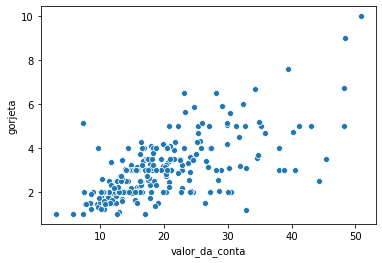

In [102]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y = 'gorjeta', data = gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme o valor da conta**

In [103]:
print(f'A base de dados contem {gorjetas.shape[0]} registros')
print('Registros não nulos:')
gorjetas.count()

A base de dados contem 244 registros
Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criação o campo porcentagem

In [104]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [105]:
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta).round(2)

In [106]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


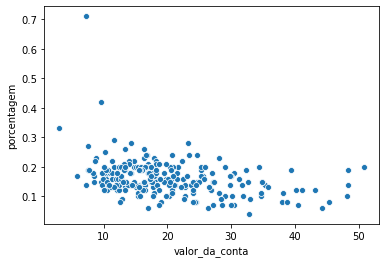

In [107]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

**Visualmente, o valor da conta nao é proporcional ao valor da gorjeta**

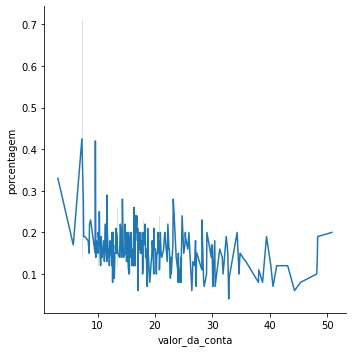

In [108]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind='line', data = gorjetas)

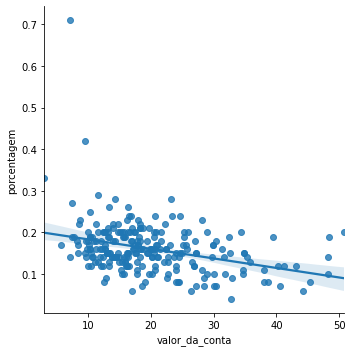

In [109]:
sns.lmplot(x='valor_da_conta', y = 'porcentagem', data=gorjetas)

In [110]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


# Análise 2 - Sobremesa

In [115]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [116]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


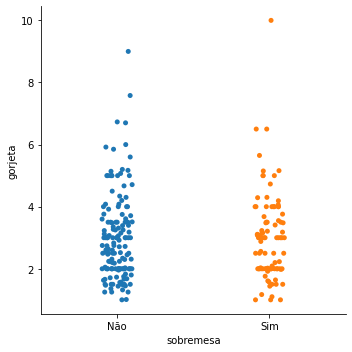

In [117]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

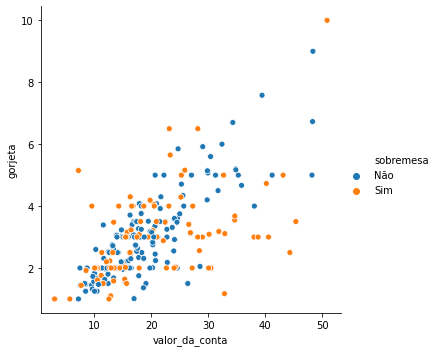

In [119]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

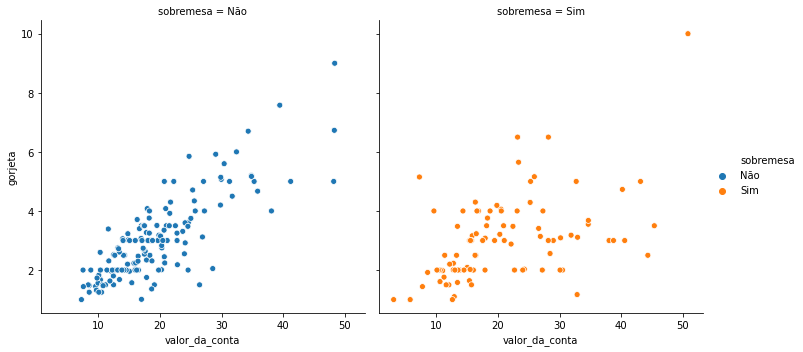

In [120]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col='sobremesa', data = gorjetas)

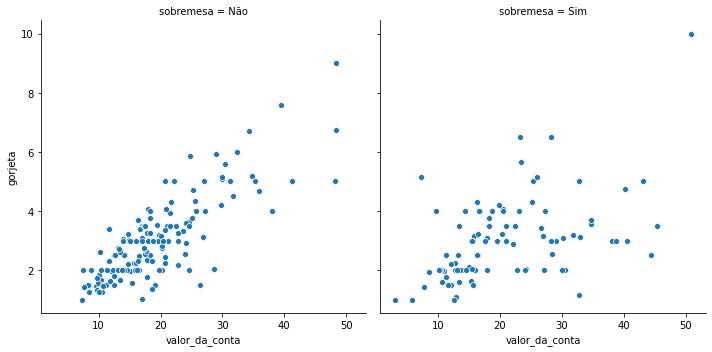

In [121]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', col='sobremesa', data = gorjetas)

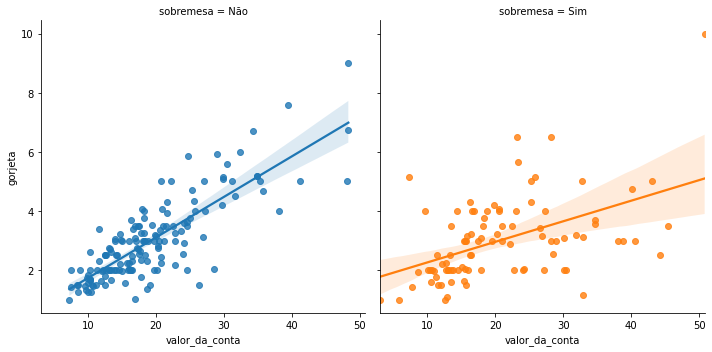

In [123]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

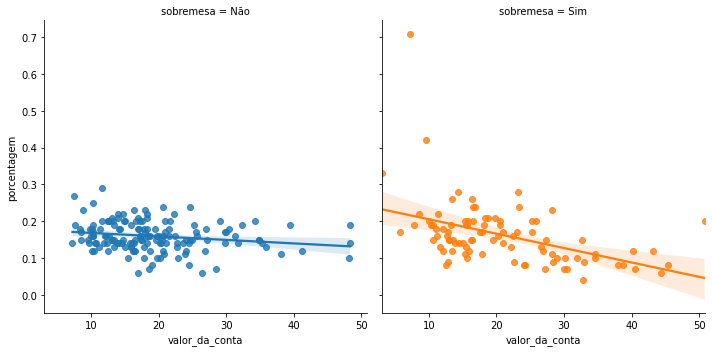

In [124]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

**Visualmente, exite uma diferença no valor da gorjeta daquele que pediram e não pediram sobremesa**

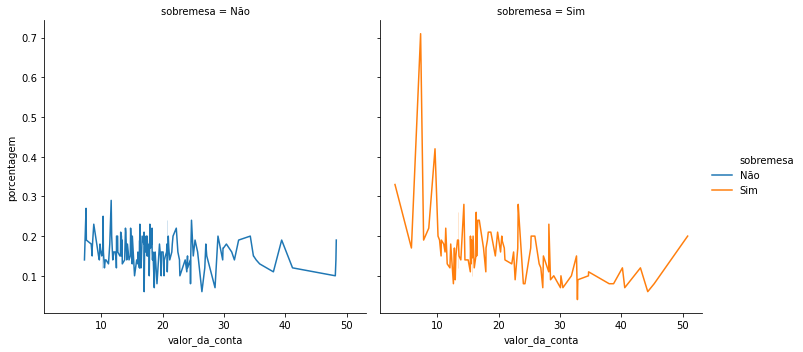

In [129]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

## Teste de hipótese

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [131]:
from scipy.stats import ranksums

In [133]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [135]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [138]:
r = ranksums(sobremesa, sem_sobremesa)

In [139]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.5266635660124415
